In [149]:
import pandas as pd
import pycountry
import plotly.express as px
import json

In [150]:
def get_alpha2(Country) :
    if result := pycountry.countries.get(name=Country) :
        alpha2 = result.alpha_2
    else : 
        try : 
            alpha2 = pycountry.countries.search_fuzzy(Country)[0].alpha_2
        except : 
            alpha2 = None
    return alpha2

In [151]:
def get_alpha3(Country) :
    if result := pycountry.countries.get(name=Country) :
        alpha3 = result.alpha_3
    else : 
        try : 
            alpha3 = pycountry.countries.search_fuzzy(Country)[0].alpha_3
        except : 
            alpha3 = None
    return alpha3

In [152]:
covid19_global = pd.read_csv('data/covid19_confirmed_global.csv')

In [153]:
covid19_global.insert(0, 'alpha2', covid19_global['Country/Region'].apply(get_alpha2))
covid19_global.insert(0, 'alpha3', covid19_global['Country/Region'].apply(get_alpha3))

In [154]:
country = pd.read_csv('data/all.csv')

In [155]:
mapping_a3 = country.set_index('alpha-3').region.to_dict()

In [156]:
covid19_global.insert(1, 'Continent', covid19_global.alpha3.map(mapping_a3))

In [157]:
covid19_global.Continent.value_counts(dropna=False)

Continent
Asia        74
Europe      73
Africa      52
Americas    50
Oceania     16
NaN          9
Name: count, dtype: int64

In [158]:
covid19_global[covid19_global.Continent.isna()]

,alpha3,Continent,alpha2,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
34,None,NaN,None,NaN,Burma,21.916200,95.956000,0,0,0,...,142466,142466,142479,142497,142511,142530,142541,142549,142558,142572
93,None,NaN,None,NaN,Congo (Brazzaville),-0.228000,15.827700,0,0,0,...,9681,9681,9681,9681,9681,10084,10084,10084,10084,10084
94,None,NaN,None,NaN,Congo (Kinshasa),-4.038300,21.758700,0,0,0,...,28199,28217,28292,28325,28354,28377,28410,28474,28511,28542
104,None,NaN,None,NaN,Diamond Princess,0.000000,0.000000,0,0,0,...,712,712,712,712,712,712,712,712,712,712
158,None,NaN,None,NaN,"Korea, South",35.907757,127.766922,1,1,2,...,104194,104736,105279,105752,106230,106898,107598,108269,108945,109559
162,None,NaN,None,NaN,Laos,19.856270,102.495496,0,0,0,...,49,49,49,49,49,49,49,49,49,49
171,None,NaN,None,NaN,MS Zaandam,0.000000,0.000000,0,0,0,...,9,9,9,9,9,9,9,9,9,9
240,None,NaN,None,NaN,Taiwan*,23.700000,121.000000,1,1,3,...,1036,1039,1045,1047,1048,1050,1050,1050,1054,1056
270,None,NaN,None,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,...,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897


In [159]:
covid19_global.iloc[[34, 158, 162, 240],1] = 'Asia'
covid19_global.iloc[[93, 94, 270],1] = 'Africa'
covid19_global.iloc[[104, 171],1] = 'Boat'

In [160]:
covid19_global.Continent.value_counts(dropna=False)

Continent
Asia        78
Europe      73
Africa      55
Americas    50
Oceania     16
Boat         2
Name: count, dtype: int64

In [161]:
covid19_global

,alpha3,Continent,alpha2,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
0,AFG,Asia,AF,NaN,Afghanistan,33.939110,67.709953,0,0,0,...,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144
1,ALB,Europe,AL,NaN,Albania,41.153300,20.168300,0,0,0,...,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155
2,DZA,Africa,DZ,NaN,Algeria,28.033900,1.659600,0,0,0,...,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378
3,AND,Europe,AD,NaN,Andorra,42.506300,1.521800,0,0,0,...,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497
4,AGO,Africa,AO,NaN,Angola,-11.202700,17.873900,0,0,0,...,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,VNM,Asia,VN,NaN,Vietnam,14.058324,108.277199,0,2,2,...,2617,2620,2626,2631,2637,2648,2659,2668,2683,2692
270,None,Africa,None,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,...,244645,246893,248482,251288,253922,256461,259133,262017,264395,265897
271,YEM,Asia,YE,NaN,Yemen,15.552727,48.516388,0,0,0,...,4531,4620,4697,4798,4881,4975,5047,5133,5233,5276
272,ZMB,Africa,ZM,NaN,Zambia,-13.133897,27.849332,0,0,0,...,88549,88730,88800,88930,89009,89071,89386,89592,89783,89918


In [162]:
covid_19 = covid19_global.drop(columns=['alpha2','alpha3', 'Province/State', 'Country/Region', 'Lat', 'Long']).groupby("Continent").sum().T

In [163]:
covid_19.columns.names = [None]

In [164]:
covid_19.index = pd.to_datetime(covid_19.index, format='%m/%d/%y')

In [165]:
covid_19.head()

,Africa,Americas,Asia,Boat,Europe,Oceania
2020-01-22,0,1,556,0,0,0
2020-01-23,0,1,654,0,0,0
2020-01-24,0,2,937,0,2,0
2020-01-25,0,2,1428,0,3,0
2020-01-26,0,6,2105,0,3,4


In [166]:
covid_19.to_csv("data/covid19.csv")

In [167]:
buttons = [
    {'label': 'Day', 'method': 'update', 'args': [{'x': [covid_19.index]}]},
    {'label': 'Week', 'method': 'update', 'args': [{'x': [covid_19.resample('W-Mon').sum().index]}]},
    {'label': 'Month', 'method': 'update', 'args': [{'x': [covid_19.resample('M').sum().index]}]}
]

In [ ]:
px.line(covid_19, y=covid_19.columns, title='Sum cumuli covid 19 cases')

In [ ]:
fig = px.line(covid_19.diff(), y=covid_19.columns, title='Sum cumuli covid 19 cases')
fig.update_layout(updatemenus=[{'type': 'buttons', 'showactive': True, 'buttons': buttons}])

In [ ]:
fig = px.line(covid_19.diff().diff(), y=covid_19.columns, title='Sum cumuli covid 19 cases')
fig.update_layout(updatemenus=[{'type': 'buttons', 'showactive': True, 'buttons': buttons}])

In [ ]:
px.line(covid_19.diff().rolling(window=14).sum(), y=covid_19.columns, title='Activated COVID-19')

In [ ]:
px.line(covid_19.diff().rolling(window=14).sum().diff(), y=covid_19.columns, title='evolution activated covid-19')

# EU

In [19]:
covid19_EU = covid19_global.query('Continent=="Europe"')

In [20]:
covid19_EU = covid19_EU.set_index(['Country/Region']).drop(columns=['alpha2','alpha3','Continent','Province/State','Lat','Long'])

In [21]:
covid19_EU = covid19_EU.groupby('Country/Region').sum().T

In [22]:
covid19_EU.index = pd.to_datetime(covid19_EU.index, format='%m/%d/%y')

In [23]:
covid19_EU.columns.names = [None]

In [24]:
covid19_EU

,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Czechia,Denmark,...,Russia,San Marino,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06,126936,12328,562907,329258,904673,177506,356859,280899,1555245,235009,...,4546307,4864,625773,365733,220698,3317948,834993,610274,1820725,4379033
2021-04-07,127192,12363,566008,330536,908212,179248,364419,282548,1560777,235623,...,4554481,4904,629388,366894,221890,3326736,841807,612575,1836260,4381830
2021-04-08,127509,12409,568914,331808,913057,180831,367376,285765,1567848,236340,...,4563026,4932,633013,368470,223416,3336637,849629,615024,1855806,4384954
2021-04-09,127795,12456,571616,333430,917917,181927,370179,288364,1573153,237038,...,4572053,4944,636418,369393,224699,3347512,857401,617543,1875605,4380167


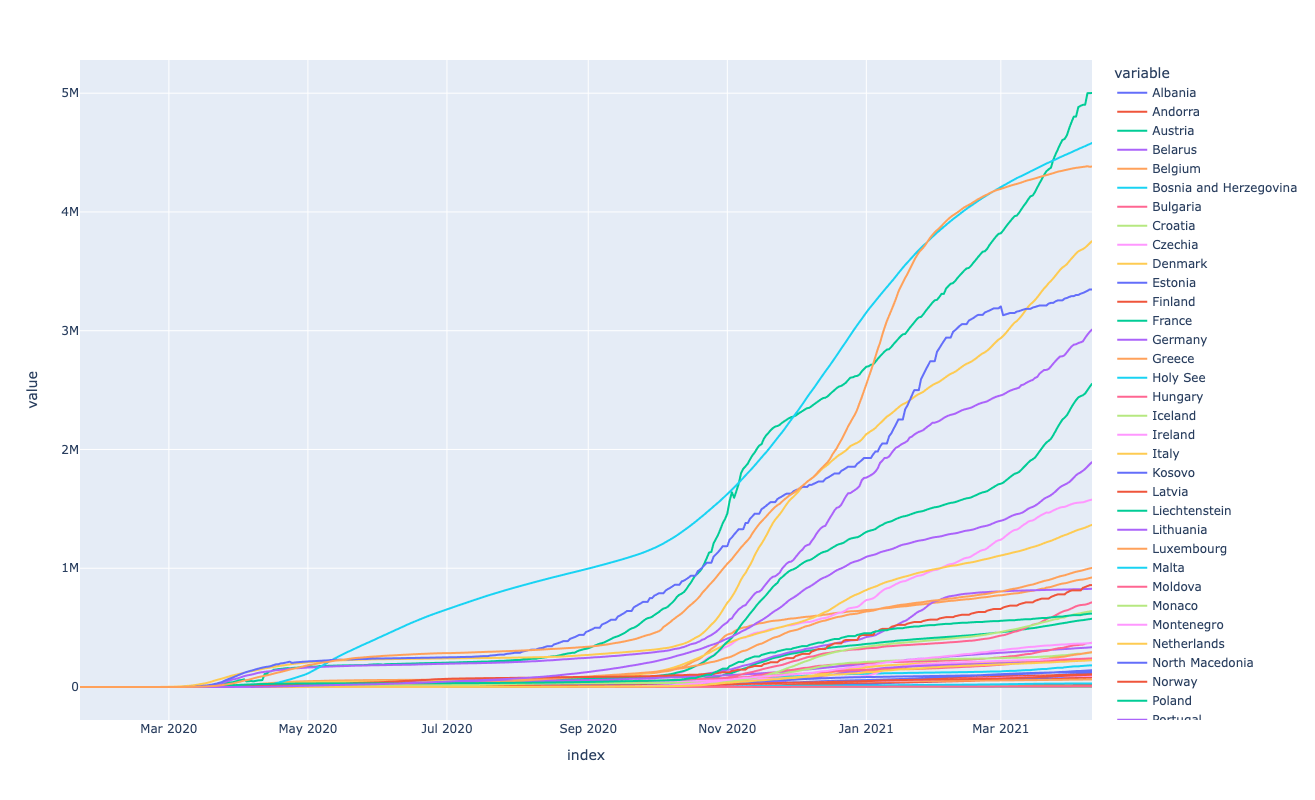

In [26]:
px.line(covid19_EU, y=covid19_EU.columns, width=1200, height=800)

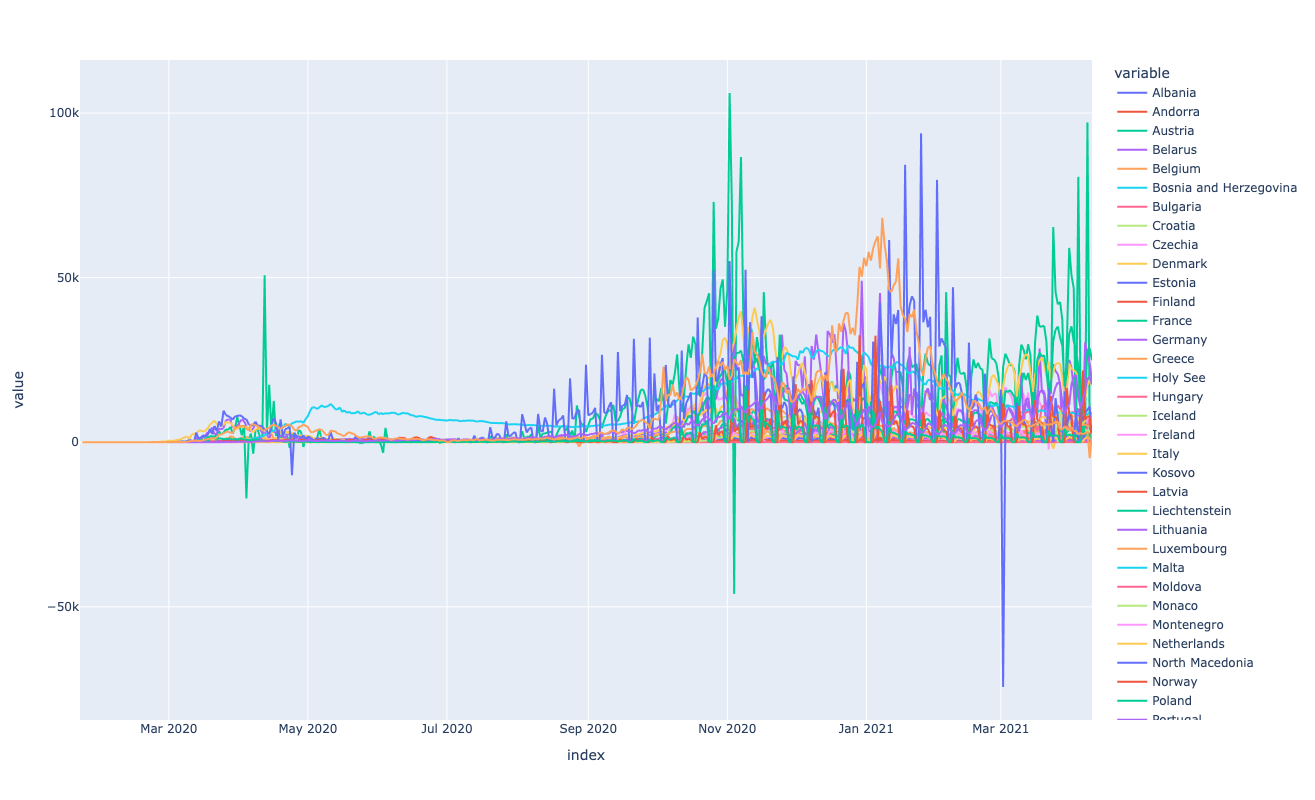

In [32]:
px.line(covid19_EU.diff(), y=covid19_EU.columns, width=1200, height=800)

# Maps

In [105]:
GeoJson = json.load(open("data/countries.geojson", "r"))

In [175]:
data = covid19_global.set_index(['alpha3',"Country/Region"]).drop(columns=["Continent",'alpha2','Province/State','Lat','Long']).T

In [179]:
data.index = pd.to_datetime(data.index, format='%m/%d/%y') 

In [182]:
data = data.resample('M').sum().iloc[:-1,:].reset_index().melt(id_vars=['index'])

/var/folders/3v/836xbswd3z1f339m_2k6w7b80000gn/T/ipykernel_9339/2939569729.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.

/var/folders/3v/836xbswd3z1f339m_2k6w7b80000gn/T/ipykernel_9339/2939569729.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [186]:
data.columns = ['Date','ISO_A3','Country/Region','Cases']

In [187]:
data

,Date,ISO_A3,Country/Region,Cases
0,2020-01-31,AFG,Afghanistan,0
1,2020-02-29,AFG,Afghanistan,6
2,2020-03-31,AFG,Afghanistan,1164
3,2020-04-30,AFG,Afghanistan,27074
4,2020-05-31,AFG,Afghanistan,225674
...,...,...,...,...
4105,2020-11-30,ZWE,Zimbabwe,268984
4106,2020-12-31,ZWE,Zimbabwe,366341
4107,2021-01-31,ZWE,Zimbabwe,787416
4108,2021-02-28,ZWE,Zimbabwe,984049


In [ ]:
fig = px.choropleth_mapbox(
    data,
    geojson=GeoJson,
    locations='ISO_A3',
    color='Cases',
    featureidkey="properties.ISO_A3",
    zoom=1,
    mapbox_style="open-street-map",
    width=1600,
    height=900,
    opacity=0.5,
    animation_frame='Date',
    color_continuous_scale="amp",
    range_color=(0,450000000)
    
)

In [ ]:
fig.write_html('Maps.html')